In [1]:
# import library
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pylab

from matplotlib import rcParams
rcParams['figure.figsize'] = (10,7)
rcParams['lines.linewidth'] = 2.5

In [2]:
# read dataset
df = pd.read_csv('train.csv', sep=';')

# 1. Descriptive Statistics 

## Tipe data 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


## Kolom categorical 

In [4]:
cat = df.select_dtypes(include='object')
catCol = cat.columns
print(f'Ada {len(catCol)} kolom categorical, yaitu:\n{catCol}')

Ada 10 kolom categorical, yaitu:
Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')


## Kolom numerik 

In [5]:
num = df.select_dtypes(include=['int64', 'float64'])
numCol = num.columns
print(f'Ada {len(numCol)} kolom categorical, yaitu:\n{numCol}')

Ada 7 kolom categorical, yaitu:
Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')


## Check null values

In [6]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

## Check duplicate  

In [7]:
df.duplicated().sum()

0

## Summary kolom 

In [8]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Describe kolom numeric 

In [9]:
df[numCol].describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


Pada kolom balance, duration, dan pdays ada jarak yang cukup besar antara mean dengan mediannya. Kemungkinan pada ketiga kolom tersebut terdapat outliers.

### Describe kolom categoric 

In [10]:
df[catCol].describe().T

,count,unique,top,freq
job,45211,12,blue-collar,9732
marital,45211,3,married,27214
education,45211,4,secondary,23202
default,45211,2,no,44396
housing,45211,2,yes,25130
loan,45211,2,no,37967
contact,45211,3,cellular,29285
month,45211,12,may,13766
poutcome,45211,4,unknown,36959
y,45211,2,no,39922


### Value counts tiap kolom categoric

In [11]:
for col in catCol:
    print(f'Value counts kolom \033[1m{col}\033[0m:\n{df[col].value_counts()}\n')

Value counts kolom job:
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

Value counts kolom marital:
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

Value counts kolom education:
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

Value counts kolom default:
no     44396
yes      815
Name: default, dtype: int64

Value counts kolom housing:
yes    25130
no     20081
Name: housing, dtype: int64

Value counts kolom loan:
no     37967
yes     7244
Name: loan, dtype: int64

Value counts kolom contact:
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

Value counts kolom month:
may    13766
jul     6895
aug     6247
jun     5341
nov 

## Kesimpulan

Semua tipe data dan nama kolom sudah sesuai

Tidak ada nilai kosong <br>
Tidak ada data duplikat

Ada nilai **minus** pada kolom **balance** dan **pdays**. <br>
Terdapat **gap** yang **besar** antara **nilai** pada kolom **y**, **default** dan **loan** <br> 
Perlu di handle pada pembersihan data.

# 2. Univariate Analysis

## Box plot kolom numeric 

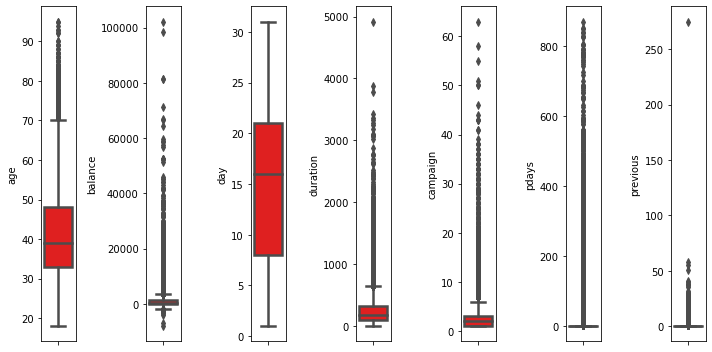

In [12]:
plt.figure(figsize=(10,5))
for i in range(0, len(numCol)):
    plt.subplot(1, len(numCol), i+1)
    sns.boxplot(y=df[numCol[i]], color='red', orient='v')
    plt.tight_layout()

Semua kolom **punya** outliers, yang **paling banyak** ada pada kolom **balance**, **duration**, dan **pdays**

## Violin plot kolom numeric 

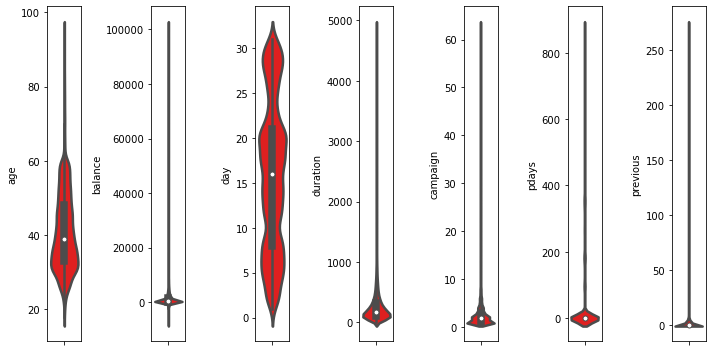

In [13]:
plt.figure(figsize=(10,5))
for i in range(0, len(numCol)):
    plt.subplot(1, len(numCol), i+1)
    sns.violinplot(y=df[numCol[i]], color='red', orient='v')
    plt.tight_layout()

## individual displot kolom numeric

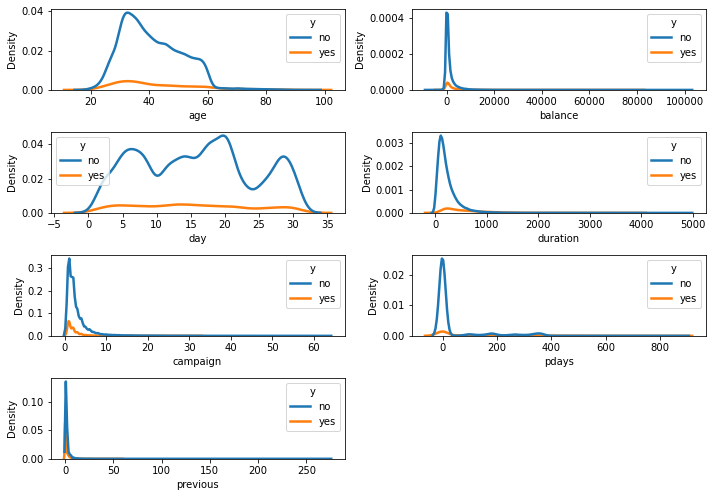

In [14]:
for i in range(0, len(numCol)):
    plt.subplot(4, 2, i+1)
    sns.kdeplot(x=df[numCol[i]], color='red', hue=df['y'])
    plt.xlabel(numCol[i])
    plt.tight_layout()

**Hampir semua** kolom **numeric** **tidak berdistribusi normal**. <br>
Kolom **campaign**, **previous**, **duration**, dan **pdays** **tidak berdistribusi normal** (**positively skew**). <br>
Sedangkan kolom **day** berbentuk **bimodal**.

In [15]:
df1 = df.copy()

In [16]:
encoding_y = {
    'yes': 1,
    'no': 0
}

In [17]:
df1['y'] = df1['y'].map(encoding_y)

## individual countplot kolom categorical

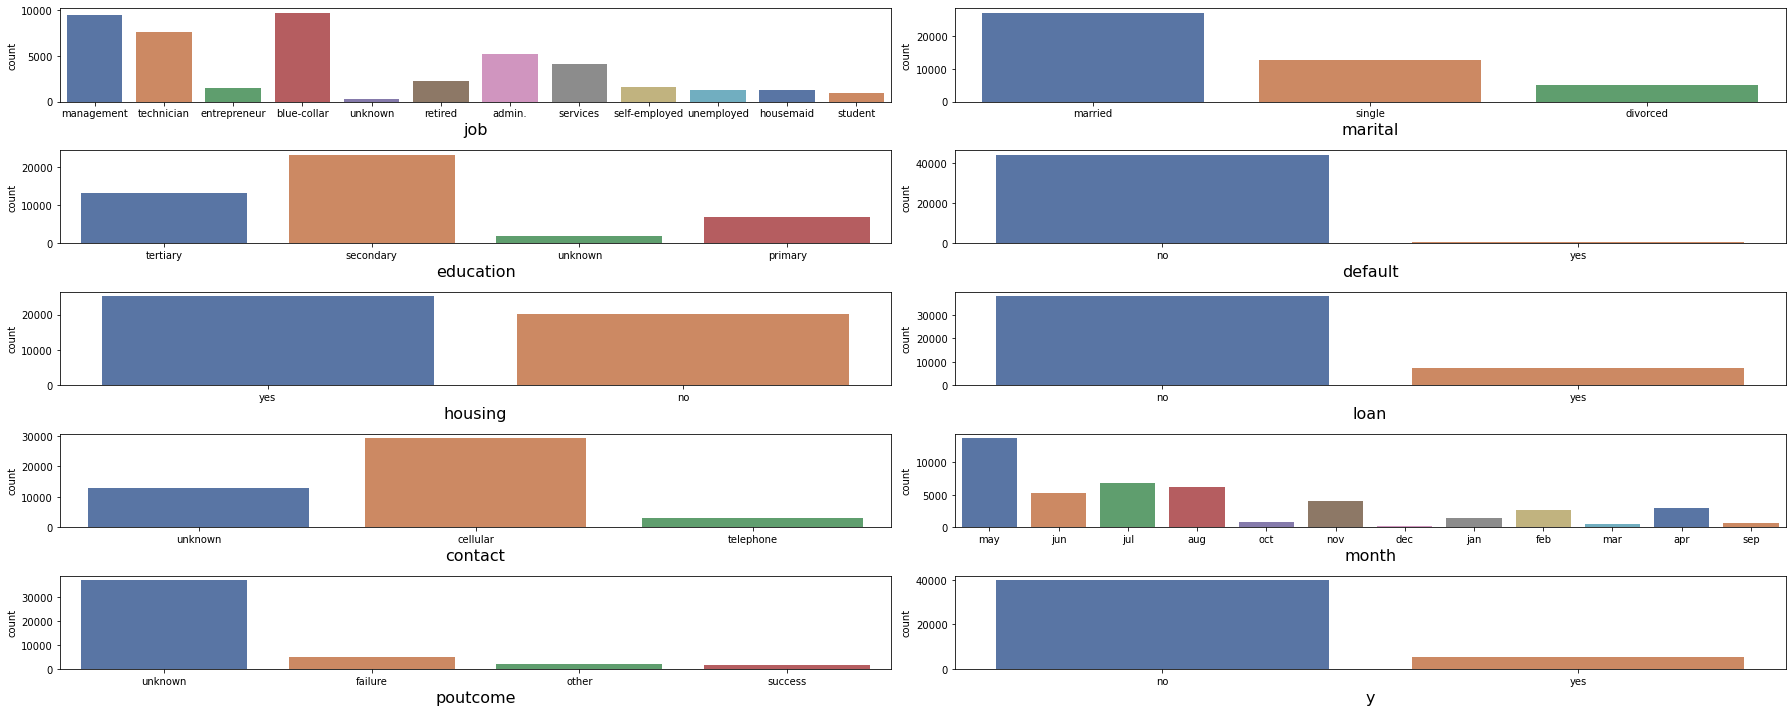

In [18]:
plt.figure(figsize = (25,10))
for i in range(0, len(catCol)):
    plt.subplot(5, 2, i+1)
    sns.countplot(x=df[catCol[i]], palette='deep', orient='h')
    plt.tight_layout()
    plt.xlabel(xlabel=catCol[i],fontsize=16)

Kolom **y** yang **yes** jauh **lebih sedikit** dibandingkan yang **no** <br>
Kolom **loan** yang **yes** jauh **lebih sedikit** dibandingkan yang **no** <br>
Kolom **default** yang **yes** jauh **lebih sedikit** dibandingkan yang **no** <br>

# 3. Multivariate analysis

## Heatmap 

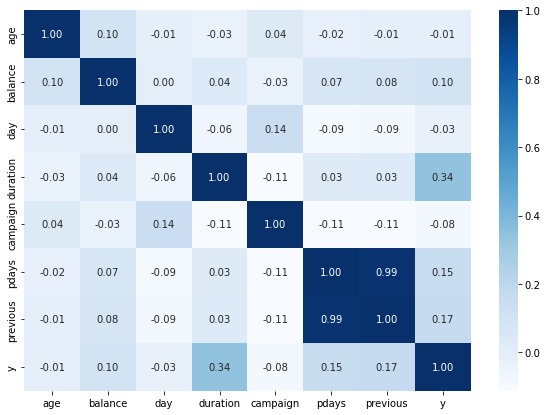

In [19]:
sns.heatmap(df1.corr(method='spearman'), cmap='Blues', annot=True, fmt='.2f')
plt.show()

Karena hampir semua data belum berdistribusi normal, maka korelasi akan menggunakan korelasi spearman

Hampir semua kolom **tidak mempunyai** korelasi yang **kuat**. <br>
hanya ada kolom **pdays** dengan kolom **previous** dengan **nilai** korelasi mencapai **0.99**, bertanda redundant yang perlu dihandle<br>

## Pair Plot kolom numeric 

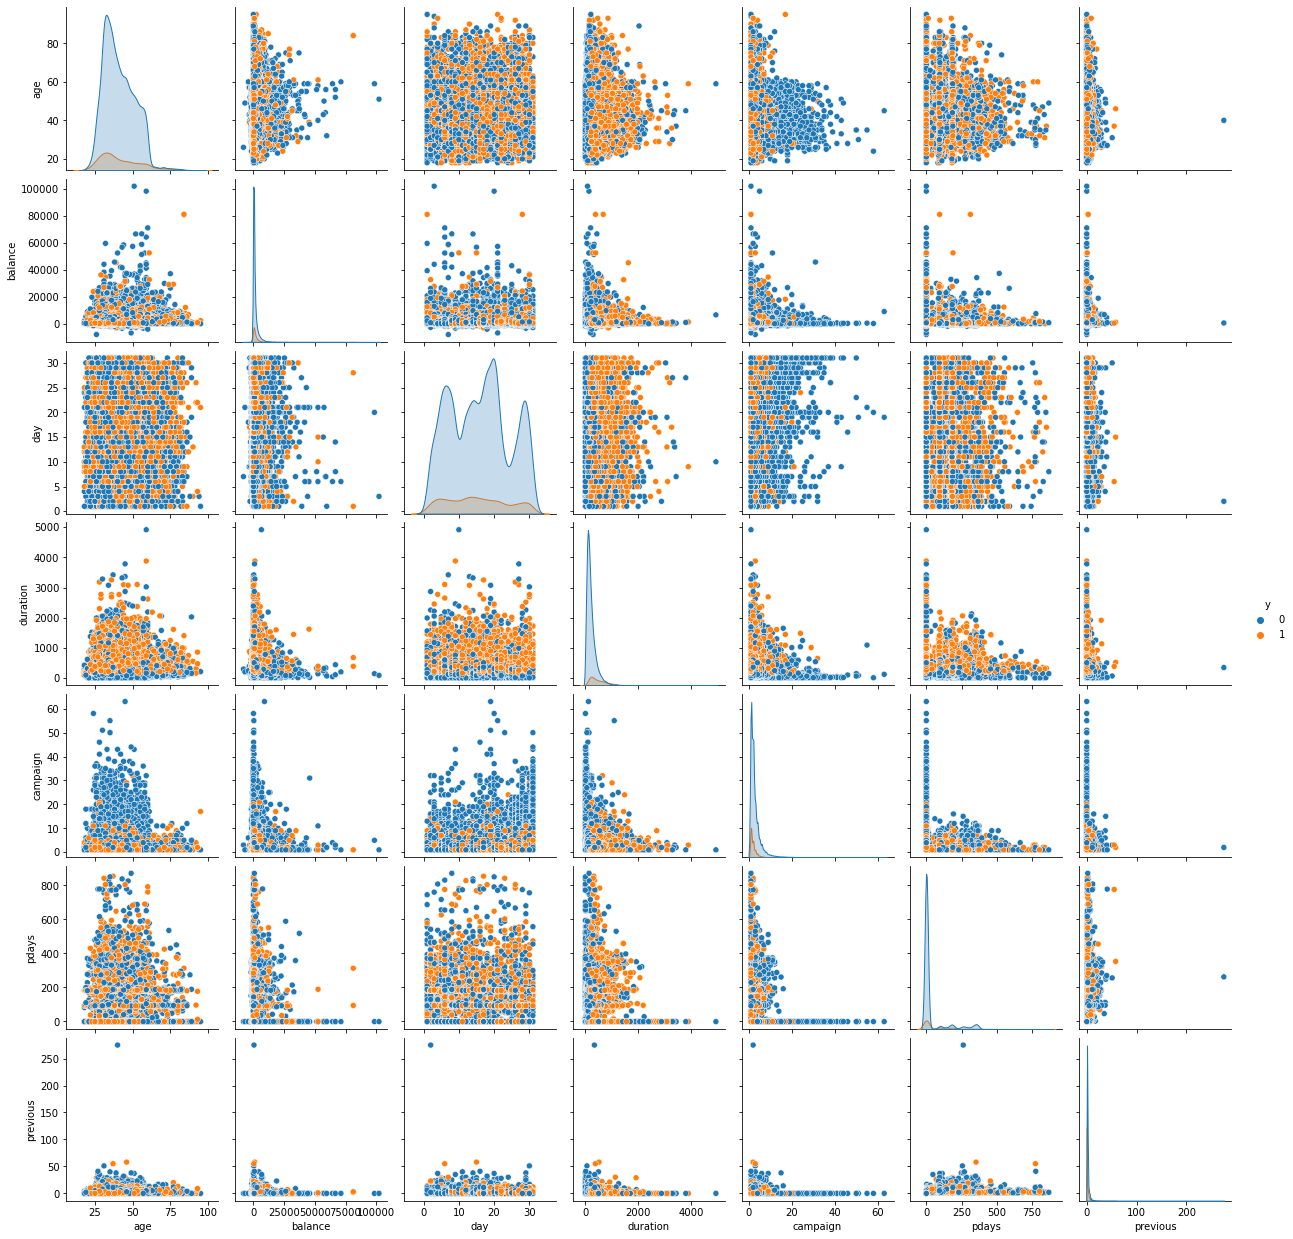

In [20]:
sns.pairplot(df1, diag_kind='kde', hue='y')
plt.show()

## Strip plot kolom categorical dengan kolom kolom numeric

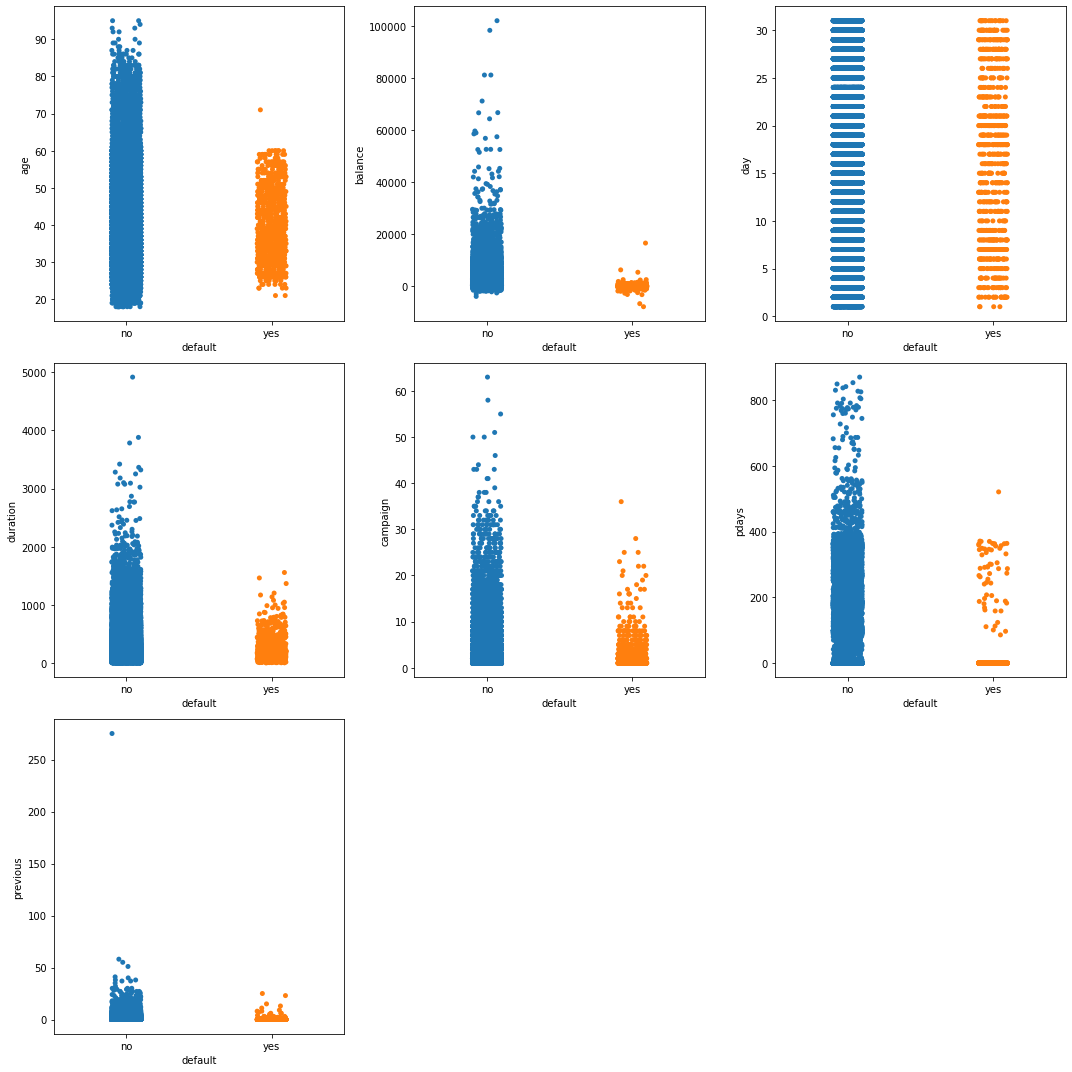

In [21]:
fig = plt.figure(figsize=(15,15))
for i in range(0, len(numCol)):
    ax = fig.add_subplot(3,3, i+1)
    sns.stripplot(ax = ax, data=df, x='default', y=numCol[i])
    plt.tight_layout()

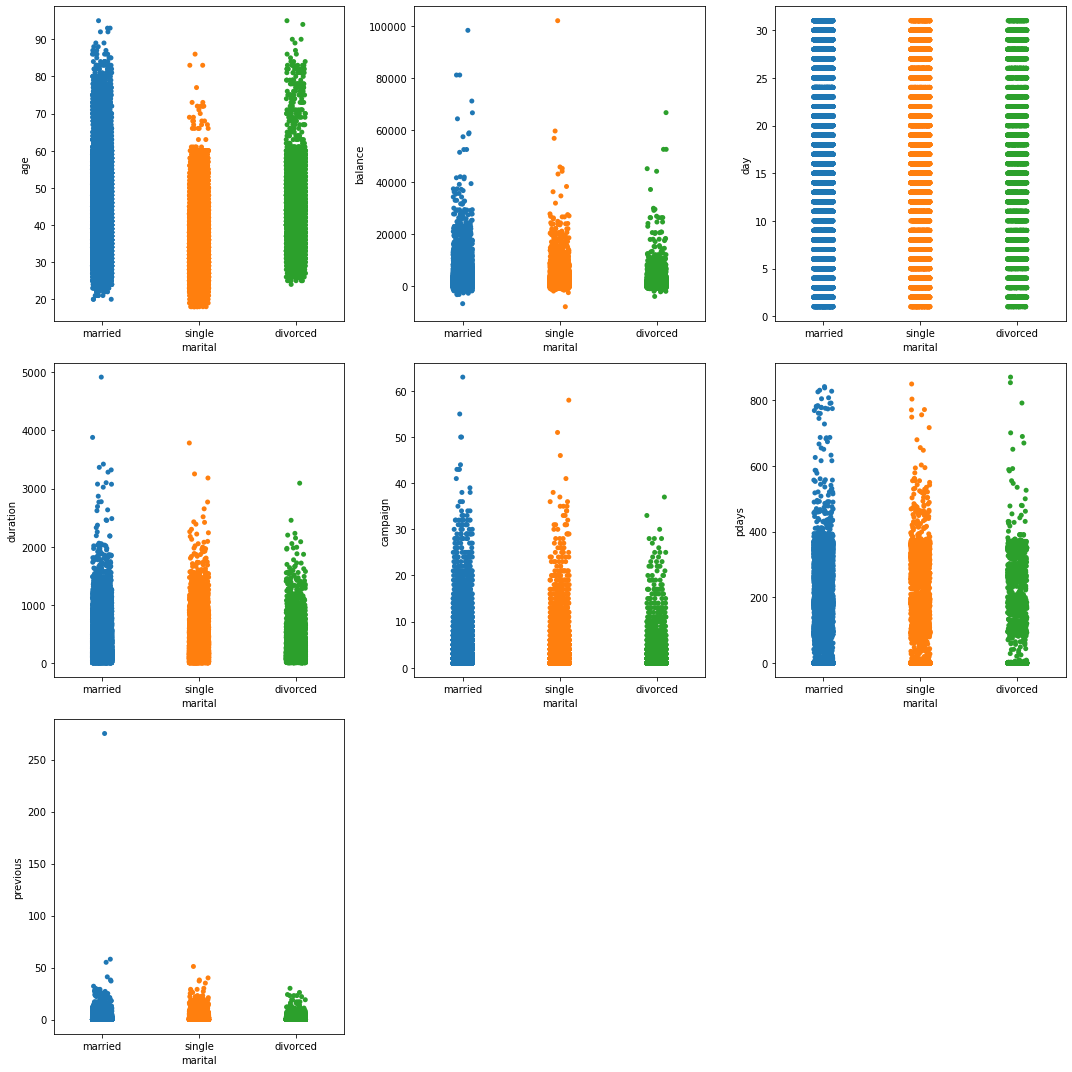

In [22]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(numCol)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='marital', y=numCol[i]) # gambar catplot/stripplotnya
    plt.tight_layout()

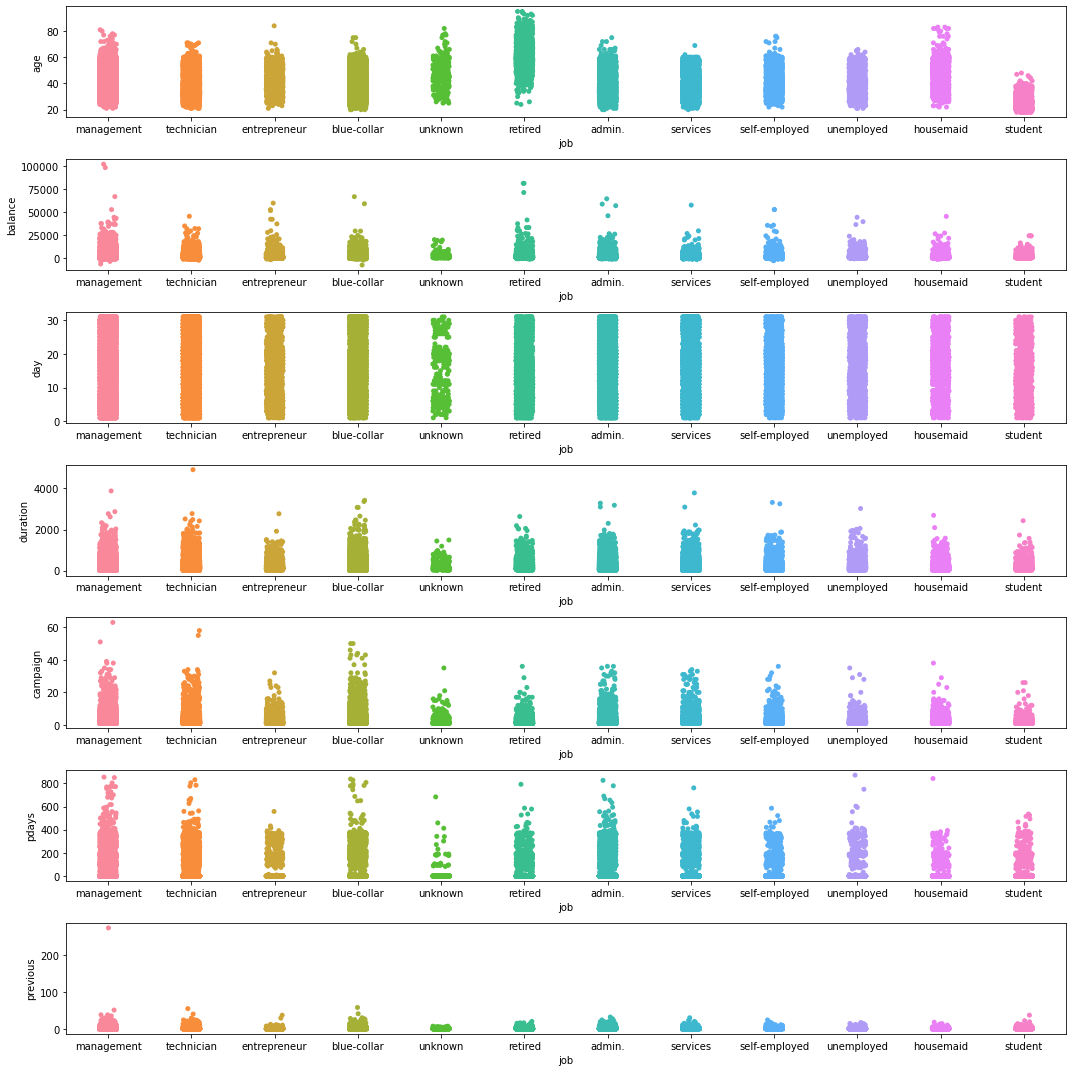

In [23]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(numCol)): # untuk setiap kolom numerik
    ax = fig.add_subplot(7, 1, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='job', y=numCol[i]) # gambar catplot/stripplotnya
    plt.tight_layout()

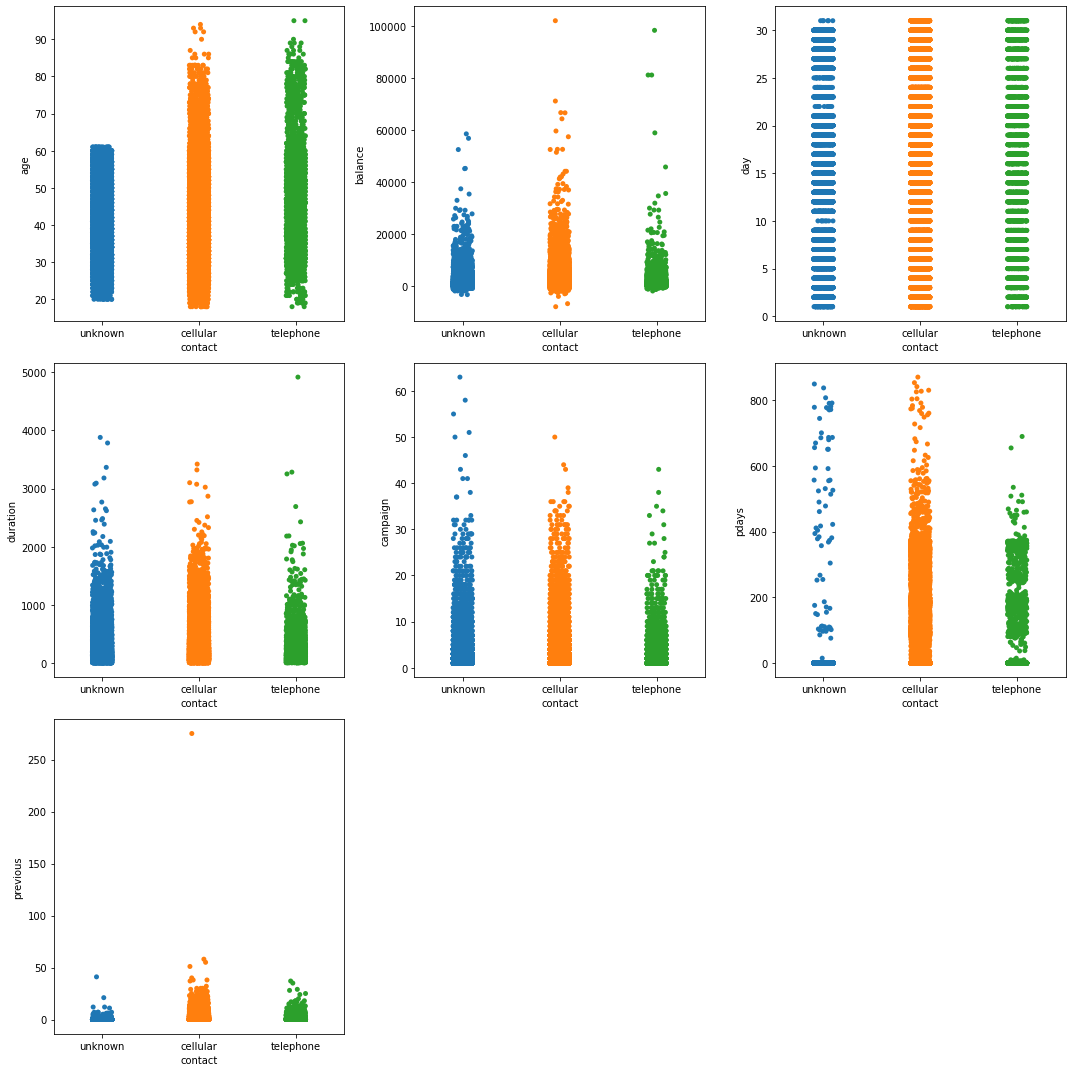

In [24]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(numCol)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='contact', y=numCol[i]) # gambar catplot/stripplotnya
    plt.tight_layout()

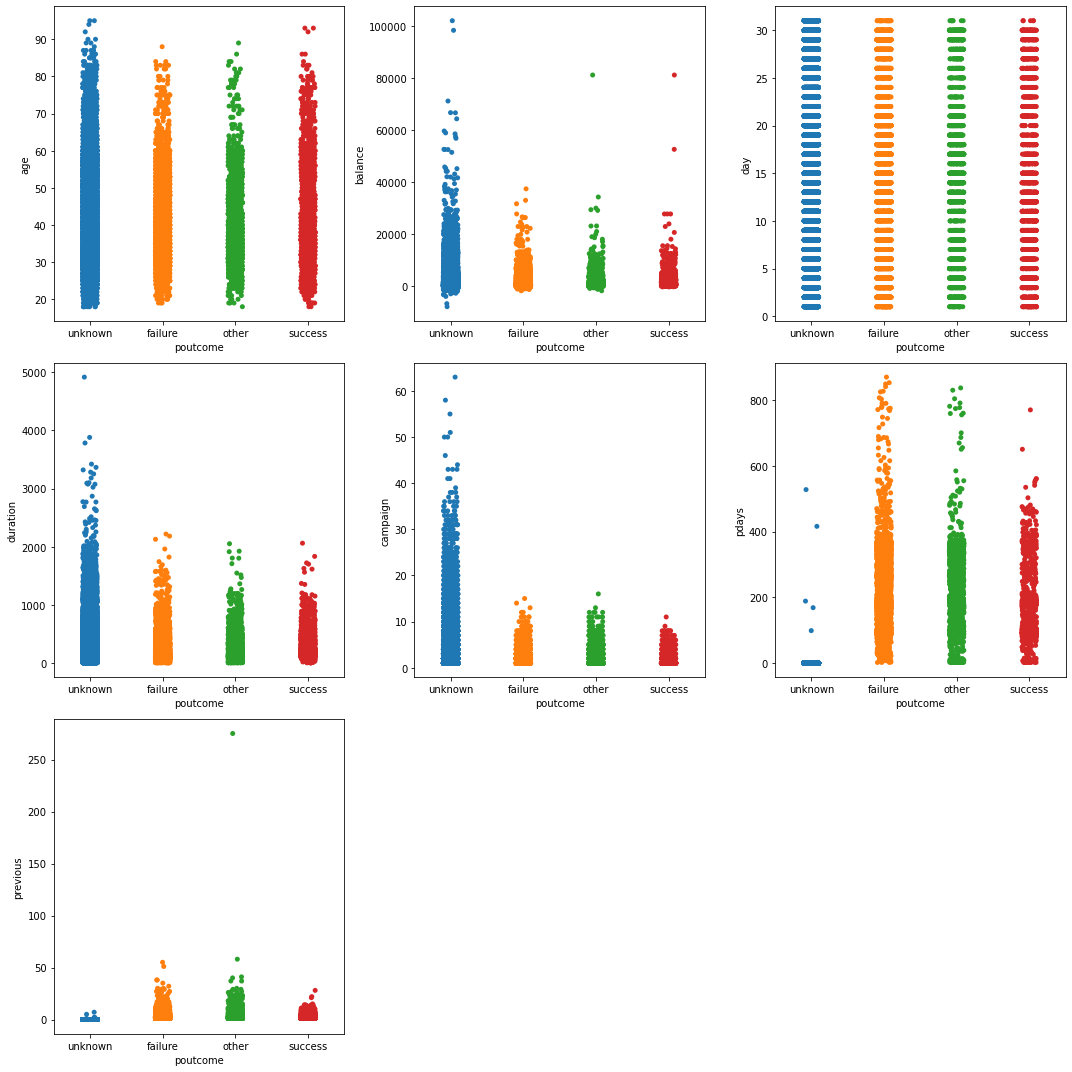

In [25]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(numCol)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='poutcome', y=numCol[i]) # gambar catplot/stripplotnya
    plt.tight_layout()

## Kesimpulan 

Tidak ada hasil yang menarik dari strip plot beberapa kolom categorical dengan kolom numeric

# 4. Business Insight

In [26]:
mapping_y = {'yes': 1,
             'no': 0}

df['y'] = df['y'].map(mapping_y)
df.sample(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1375,34,technician,single,tertiary,no,301,yes,no,unknown,8,may,205,1,-1,0,unknown,0
19886,33,management,married,tertiary,no,1047,no,no,cellular,8,aug,512,4,-1,0,unknown,1
29377,40,technician,divorced,secondary,no,93,no,no,cellular,2,feb,123,2,-1,0,unknown,0


## Default and Loan

In [27]:
df_default = df.groupby('default')['y'].sum()/(df['y'].sum())
df_loan = df.groupby('loan')['y'].sum()/(df['y'].sum())
print('\n', df_default)
print('\n', df_loan)


 default
no     0.990168
yes    0.009832
Name: y, dtype: float64

 loan
no     0.908489
yes    0.091511
Name: y, dtype: float64


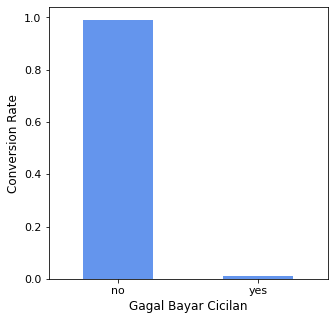

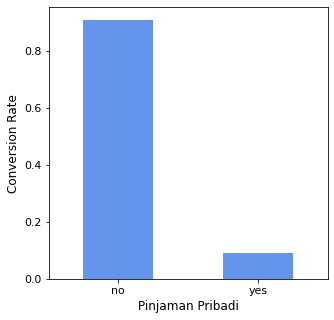

In [28]:
plt.figure(figsize=(5,5))
df_default.plot(kind = 'bar', color='cornflowerblue')
plt.xticks(rotation=0, fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.xlabel('Gagal Bayar Cicilan', fontsize=12)
plt.ylabel('Conversion Rate', fontsize=12)
plt.show()

plt.figure(figsize=(5,5))
df_loan.plot(kind = 'bar', color='cornflowerblue')
plt.xticks(rotation=0, fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.xlabel('Pinjaman Pribadi', fontsize=12)
plt.ylabel('Conversion Rate', fontsize=12)
plt.show()

**Observation:** <br>
Nasabah yang mengambil deposito kurang lebih memiliki karakteristik sama, yaitu condong ke tidak punya riwayat gagal bayar cicilan dan tidak punya pinjaman pribadi, dengan conversion rate 10-11%.

## Month

In [29]:
df_month = df.groupby('month')['y'].sum()/(df['y'].count())
df_month = df_month.sort_values(ascending=False)
df_month

month
may    0.020460
aug    0.015218
jul    0.013868
apr    0.012762
jun    0.012077
feb    0.009754
nov    0.008914
oct    0.007144
sep    0.005950
mar    0.005485
jan    0.003141
dec    0.002212
Name: y, dtype: float64

In [30]:
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

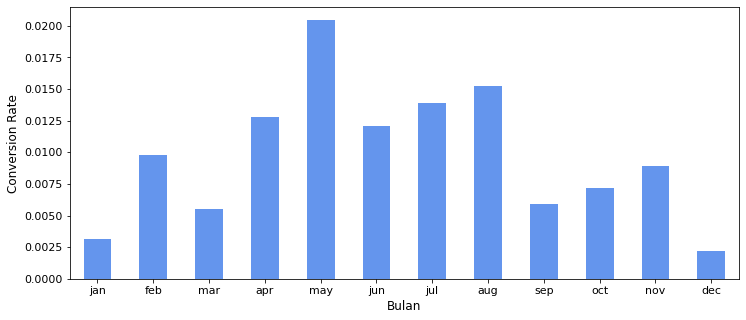

In [31]:
plt.figure(figsize=(12,5))
df_month.loc[month_order].plot(kind = 'bar', color='cornflowerblue')
plt.xticks(rotation=0, fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Conversion Rate', fontsize=12)
plt.show()

**Observation:**<br>
Kebanyakan nasabah mengambil deposito pada Bulan Mei (late spring) untuk persiapan sebelum masuk tahun ajaran baru (September) atau persiapan sebelum libur akhir tahun/libur musim dingin(Desember).

## Job

In [32]:
df_job = df.groupby('job')['y'].sum()/(df['y'].count())
df_job

job
admin.           0.013957
blue-collar      0.015660
entrepreneur     0.002721
housemaid        0.002411
management       0.028776
retired          0.011413
self-employed    0.004136
services         0.008162
student          0.005950
technician       0.018580
unemployed       0.004468
unknown          0.000752
Name: y, dtype: float64

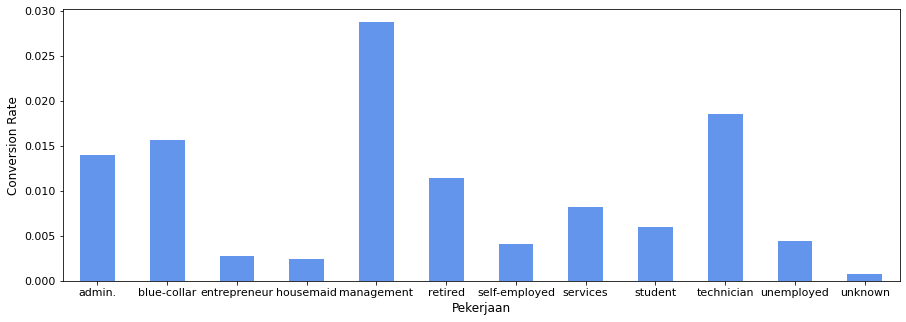

In [33]:
plt.figure(figsize=(15,5))
df_job.plot(kind = 'bar', color='cornflowerblue')
plt.xticks(rotation=0, fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.xlabel('Pekerjaan', fontsize=12)
plt.ylabel('Conversion Rate', fontsize=12)
plt.show()

**Observation:**<br>
Pekerjaan di bidang management paling tinggi conversion ratenya (2,9%)


## Status

In [34]:
df_marital = df.groupby('marital')['y'].sum()/(df['y'].count())
df_marital

marital
divorced    0.013758
married     0.060936
single      0.042291
Name: y, dtype: float64

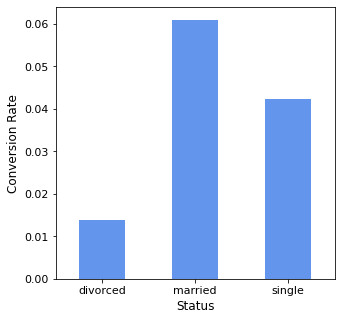

In [35]:
plt.figure(figsize=(5,5))
df_marital.plot(kind = 'bar', color='cornflowerblue')
plt.xticks(rotation=0, fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.xlabel('Status', fontsize=12)
plt.ylabel('Conversion Rate', fontsize=12)
plt.show()

**Observation:**<br>
Nasabah dengan status sudah menikah paling tinggi conversion ratenya (6%)


## Education

In [36]:
df_education = df.groupby('education')['y'].sum()/(df['y'].count())
df_education

education
primary      0.013072
secondary    0.054190
tertiary     0.044149
unknown      0.005574
Name: y, dtype: float64

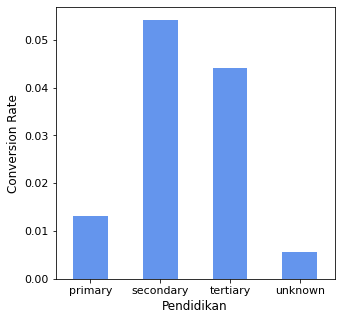

In [37]:
plt.figure(figsize=(5,5))
df_education.plot(kind = 'bar', color='cornflowerblue')
plt.xticks(rotation=0, fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.xlabel('Pendidikan', fontsize=12)
plt.ylabel('Conversion Rate', fontsize=12)
plt.show()

**Observation:**<br>
Nasabah dengan pendidikan secondary sudah menikah paling tinggi conversion ratenya (6%)


## Contact

In [38]:
df_contact = df.groupby('contact')['y'].sum()/(df['y'].count())
df_contact

contact
cellular     0.096636
telephone    0.008626
unknown      0.011723
Name: y, dtype: float64

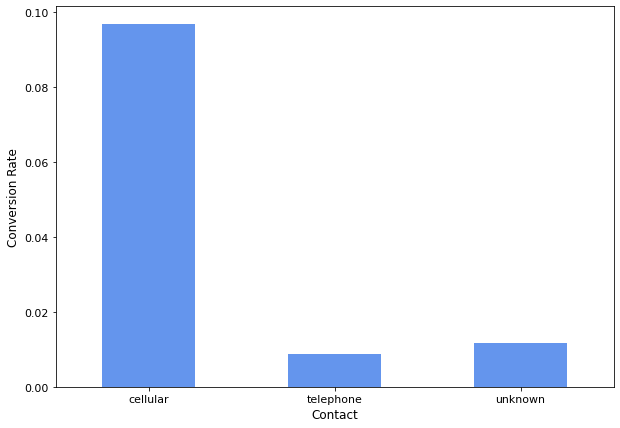

In [39]:
df_contact.plot(kind = 'bar', color='cornflowerblue')
plt.xticks(rotation=0, fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.xlabel('Contact', fontsize=12)
plt.ylabel('Conversion Rate', fontsize=12)
plt.show()

**Observation:**<br>
Nasabah paling banyak mengambil deposito saat dihubungi ke nomor ponselnya dengan conversion rate 9.7%.

## Housing

In [40]:
df_housing = df.groupby('housing')['y'].sum()/(df['y'].count())
df_housing

housing
no     0.074185
yes    0.042799
Name: y, dtype: float64

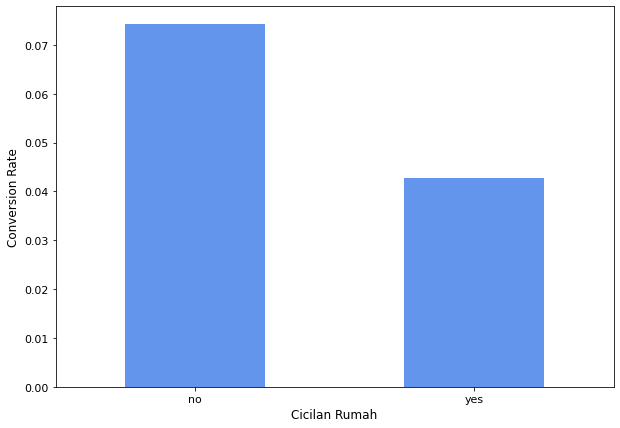

In [41]:
df_housing.plot(kind = 'bar', color='cornflowerblue')
plt.xticks(rotation=0, fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.xlabel('Cicilan Rumah', fontsize=12)
plt.ylabel('Conversion Rate', fontsize=12)
plt.show()

**Observation:**<br>
Nasabah yang tidak punya cicilan rumah adalah yang paling banyak mengambil deposito dengan conversion rate 7.4%.

In [42]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


## Age

In [43]:
age_group = []
for x in df['age']:
    if x <=24 :
        age_group.append('early working')
    elif x <=54 :
        age_group.append('prime working')
    elif x <=64 :
        age_group.append('mature working')
    else:
        age_group.append('elderly')

df['age_group'] = age_group


In [44]:
age_order = ['early working', 'prime working', 'mature working', 'elderly']

In [45]:
df_age = df.groupby('age_group')['y'].sum()/(df['y'].count())
df_age = df_age.sort_values(ascending=False)
df_age

age_group
prime working     0.090686
mature working    0.014178
elderly           0.007542
early working     0.004579
Name: y, dtype: float64

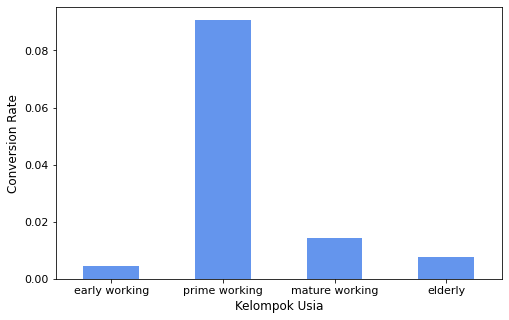

In [46]:
plt.figure(figsize=(8,5))
df_age.loc[age_order].plot(kind = 'bar', color='cornflowerblue')
plt.xticks(rotation=0, fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.xlabel('Kelompok Usia', fontsize=12)
plt.ylabel('Conversion Rate', fontsize=12)
plt.show()

**Observation:**<br>
Nasabah dengan kategori prime working (usia 25-54) tahun adalah yang paling banyak mengambil deposito dengan conversion rate 9%.

## Balance

In [47]:
balance_group = []
for x in df['balance']:
    if x < 0:
        balance_group.append('<0')
    elif x <= 5000:
        balance_group.append('0-5000')
    elif x <= 10000:
        balance_group.append('5001-10000')
    elif x <= 25000:
        balance_group.append('10001-25000')
    else:
        balance_group.append('25000+')
        
df['balance_group'] = balance_group

In [48]:
balance_order = ['<0', '0-5000', '5001-10000', '10001-25000', '25000+']

In [49]:
df_balance = df.groupby('balance_group')['y'].sum()/(df['y'].count())
df_balance = df_balance.sort_values(ascending=False)
df_balance

balance_group
0-5000         0.102586
5001-10000     0.006768
<0             0.004645
10001-25000    0.002610
25000+         0.000376
Name: y, dtype: float64

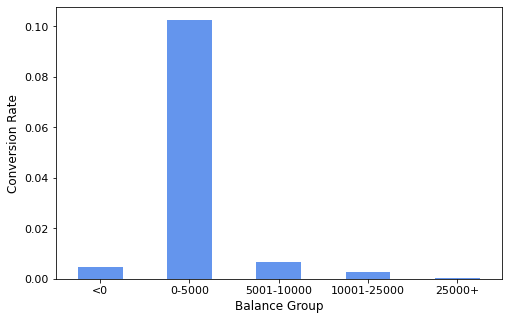

In [50]:
plt.figure(figsize=(8,5))
df_balance.loc[balance_order].plot(kind = 'bar', color='cornflowerblue')
plt.xticks(rotation=0, fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.xlabel('Balance Group', fontsize=12)
plt.ylabel('Conversion Rate', fontsize=12)
plt.show()

**Observation:**<br>
Nasabah dengan kategori balance 0-5000 adalah yang paling banyak mengambil deposito dengan conversion rate 10.2%.

## Contact

In [51]:
def segment(x):
    if x['pdays'] == -1:
        segment = 'No contact'
    else:
        segment = 'Contacted'
    return segment

df['pdays_group'] = df.apply(lambda x: segment(x), axis = 1)

In [52]:
pdays_order = ['No contact', 'Contacted']

In [53]:
df_pdays = df.groupby('pdays_group')['y'].sum()/(df['y'].count())
df_pdays

pdays_group
Contacted     0.042136
No contact    0.074849
Name: y, dtype: float64

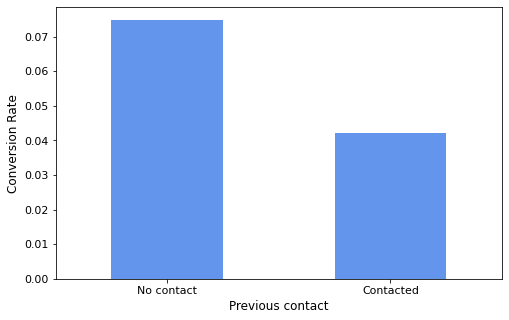

In [54]:
plt.figure(figsize=(8,5))
df_pdays.loc[pdays_order].plot(kind = 'bar', color='cornflowerblue')
plt.xticks(rotation=0, fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.xlabel('Previous contact', fontsize=12)
plt.ylabel('Conversion Rate', fontsize=12)
plt.show()

**Observation:**<br>
Nasabah yang sama sekali belum pernah dikontak sebelumnya dan memilih untuk mengambil deposito memiliki conversion rate 7.5%.

## Duration tipe 1

In [55]:
duration_group = []
for x in df['duration']:
    if x <= 180 :
        duration_group.append('0-3')
    elif x <= 360 :
        duration_group.append('3-6')
    elif x <= 540 :
        duration_group.append('6-9')
    elif x <= 720 :
        duration_group.append('9-12')
    elif x <= 900 :
        duration_group.append('12-15')
    elif x <= 1080:
        duration_group.append('15-18')
    elif x <= 1260:
        duration_group.append('18-21')
    elif x <= 1440:
        duration_group.append('22-25')
    elif x <= 1620:
        duration_group.append('25-28')
    else:
        duration_group.append('28+')

df['duration_group'] = duration_group

In [56]:
duration_order = ['0-3','3-6','6-9','9-12','12-15','15-18','18-21','22-25','25-28','28+']

In [57]:
df_duration = df.groupby('duration_group')['y'].sum()/(df['y'].count())
df_duration

duration_group
0-3      0.015682
12-15    0.010882
15-18    0.007609
18-21    0.004689
22-25    0.002522
25-28    0.001769
28+      0.001991
3-6      0.033930
6-9      0.021278
9-12     0.016633
Name: y, dtype: float64

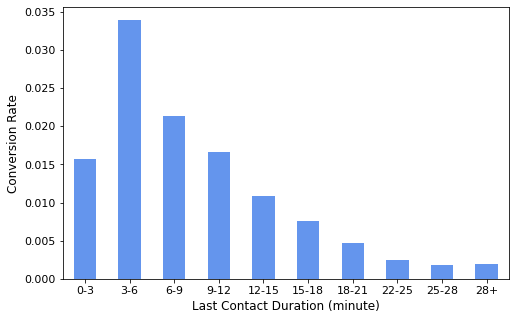

In [58]:
plt.figure(figsize=(8,5))
df_duration.loc[duration_order].plot(kind = 'bar', color='cornflowerblue')
plt.xticks(rotation=0, fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.xlabel('Last Contact Duration (minute)', fontsize=12)
plt.ylabel('Conversion Rate', fontsize=12)
plt.show()

**Observation:**<br>
Nasabah dengan durasi telepon terakhir 3-6 menit memiliki conversion rate tertinggi, yaitu 3.4%.

## Duration tipe 2

In [59]:
duration_group = []
for x in df['duration']:
    if x <= 60 :
        duration_group.append('1')
    elif x <= 120 :
        duration_group.append('2')
    elif x <= 180 :
        duration_group.append('3')
    elif x <= 240 :
        duration_group.append('4')
    elif x <= 300 :
        duration_group.append('5')
    elif x <= 360:
        duration_group.append('6')
    elif x <= 420:
        duration_group.append('7')
    elif x <= 480 :
        duration_group.append('8')
    elif x <= 540:
        duration_group.append('9')
    elif x <= 600:
        duration_group.append('10')
    else:
        duration_group.append('10+')

df['duration_group'] = duration_group

In [60]:
duration_order = ['1','2','3','4', '5', '6', '7','8', '9', '10', '10+']

In [61]:
df_duration = df.groupby('duration_group')['y'].sum()/(df['y'].count())
df_duration

duration_group
1      0.000199
10     0.005552
10+    0.040543
2      0.004468
3      0.011015
4      0.012895
5      0.011922
6      0.009113
7      0.008361
8      0.006680
9      0.006237
Name: y, dtype: float64

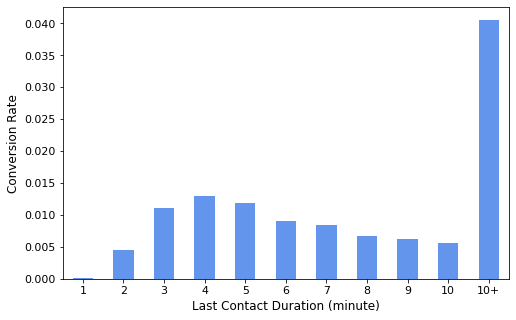

In [62]:
plt.figure(figsize=(8,5))
df_duration.loc[duration_order].plot(kind = 'bar', color='cornflowerblue')
plt.xticks(rotation=0, fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.xlabel('Last Contact Duration (minute)', fontsize=12)
plt.ylabel('Conversion Rate', fontsize=12)
plt.show()

## Campaign 

In [63]:
campaign_group = []
for x in df['campaign']:
    if x < 3 :
        campaign_group.append('1-2')
    elif x <5 :
        campaign_group.append('3-4')
    elif x <7 :
        campaign_group.append('5-6')
    elif x <9 :
        campaign_group.append('7-8')
    elif x <11 :
        campaign_group.append('9-10')
    elif x <13 :
        campaign_group.append('11-12')
    else:
        campaign_group.append('13+')

df['campaign_group'] = campaign_group

In [64]:
campaign_order = ['1-2','3-4','5-6','7-8','9-10','11-12','13+']

In [65]:
df_campaign = df.groupby('campaign_group')['y'].sum()/(df['y'].count())
df_campaign

campaign_group
1-2      0.087634
11-12    0.000442
13+      0.000597
3-4      0.020681
5-6      0.005109
7-8      0.001747
9-10     0.000774
Name: y, dtype: float64

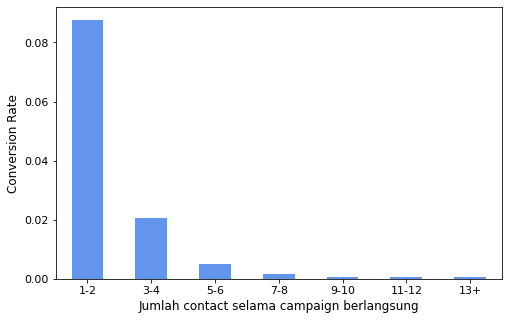

In [66]:
plt.figure(figsize=(8,5))
df_campaign.loc[campaign_order].plot(kind = 'bar', color='cornflowerblue')
plt.xticks(rotation=0, fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.xlabel('Jumlah contact selama campaign berlangsung', fontsize=12)
plt.ylabel('Conversion Rate', fontsize=12)
plt.show()

**Observation:**<br>
Nasabah dengan kategori 1-2 kali kontak selama campaign berlangsung adalah yang paling banyak mengambil deposito dengan conversion rate 8.7%.

## Age & Duration

In [67]:
sns.set_theme(style="whitegrid")

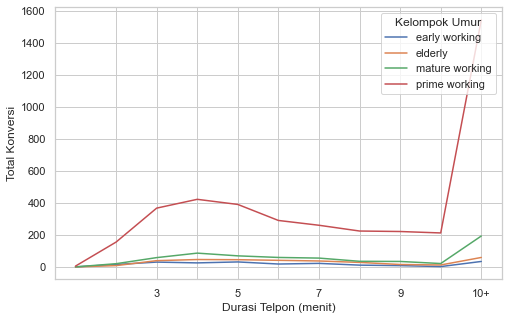

In [68]:
pd.pivot_table(df,index='duration_group',columns='age_group',values='y', aggfunc='sum').loc[duration_order].plot(figsize=(8,5))
plt.legend(loc='upper right', title='Kelompok Umur')
plt.xticks([1,2,3,4,5,6,7,8,9,10], rotation=0, fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.xlabel('Durasi Telpon (menit)', fontsize=12)
plt.ylabel('Total Konversi', fontsize=12)
plt.show()

**Observation:**<br>
Setiap kelompok umur memiliki puncak optimal di durasi telpon 3-6 menit.<br>
Kurva total konversi naik sampai menit ke 3-6, kemudian turun di menit setelahnya.<br>
Kelompok umur prime working memiliki total konversi terbanyak.

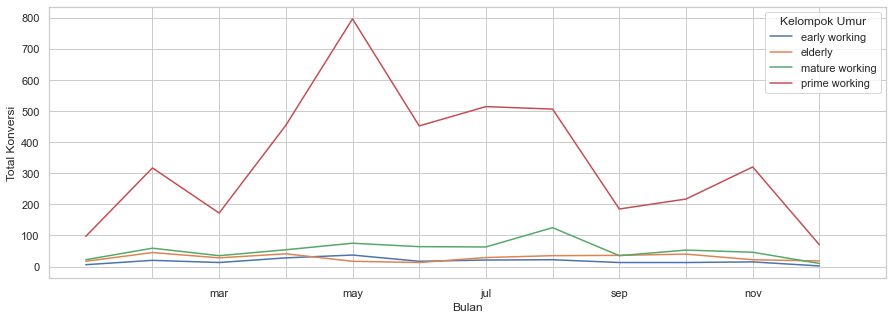

In [69]:
pd.pivot_table(df,index='month',columns="age_group",values="y",aggfunc='sum').loc[month_order].plot(figsize=(15,5))
plt.legend(loc='upper right', title='Kelompok Umur')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],rotation=0, fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Total Konversi', fontsize=12)
plt.show()

**Observation:**<br>
Kelompok umur prime working memiliki total konversi terbanyak dengan puncak optimal di bulan Mei.<br>
Kelompok umur mature working memiliki puncak optimal di bulan Agustus.<br>

## Duration and Campaign

In [70]:
df['minute'] = df['duration'].apply(lambda x: x/60)

<Figure size 720x360 with 0 Axes>

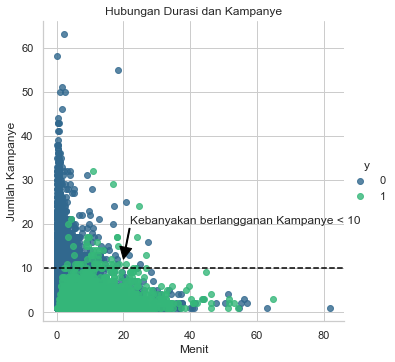

In [71]:
plt.figure(figsize=(10,5))
sns.lmplot(x='minute',y='campaign', hue='y', data=df, fit_reg=False, palette='viridis')
plt.title('Hubungan Durasi dan Kampanye')
plt.axhline(y=10, ls='--', c='black')
plt.annotate('Kebanyakan berlangganan Kampanye < 10',xytext = (22,20),
             arrowprops=dict(color = 'black', width=1),xy=(20,12))
plt.xlabel('Menit')
plt.ylabel('Jumlah Kampanye')
plt.show()

**Observation:**<br>
Calon nasabah yang dikampanye kurang dari 10 kali dan dihubungi dengan durasi kurang dari 20 menit berpotensi membuka tabungan deposito berjangka

## Age and Balance

In [72]:
df.rename(index=str, columns={'y': 'response'}, inplace = True)

def convert(df, new_column, old_column):
    df[new_column] = df[old_column].apply(lambda x: 0 if x == 0 else 1)
    return df[new_column].value_counts()

convert(df, "response_binary", "response")

0    39922
1     5289
Name: response_binary, dtype: int64

In [73]:
age_balance1 = pd.DataFrame(df.groupby(['age_group','balance_group'])['response_binary'].sum())
age_balance2 = pd.DataFrame(df.groupby(['age_group','balance_group'])['response'].count())

age_balance1['response'] = age_balance2['response']
age_balance1['response_rate'] = age_balance1['response_binary']/ (age_balance1['response'])
age_balance1 = age_balance1.drop(['response_binary','response'],axis =1)

age_balance1 = age_balance1.unstack()

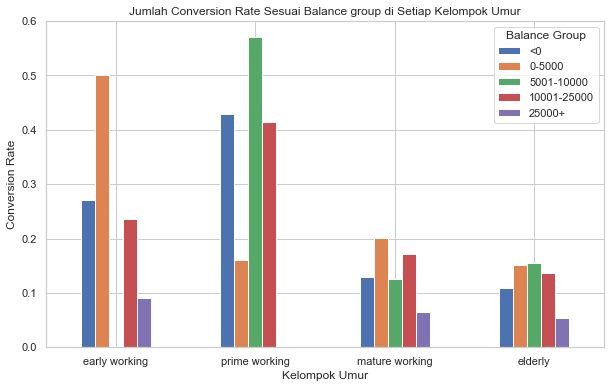

In [74]:
age_bal = age_balance1.plot(kind='bar',figsize = (10,6))

# Set x ticks
plt.xticks(np.arange(4),('early working', 'prime working', 'mature working', 'elderly'),rotation = 'horizontal')

# Set legend
plt.legend(['<0', '0-5000', '5001-10000', '10001-25000', '25000+'], loc='upper right', title='Balance Group', ncol = 1)
plt.ylabel('Conversion Rate')
plt.xlabel('Kelompok Umur')
plt.title('Jumlah Conversion Rate Sesuai Balance group di Setiap Kelompok Umur')
plt.show()

**Insight** Pelanggan 'ya' untuk kelompok usia yang berbeda: keinginan untuk berlangganan sangat tinggi untuk orang berusia di antara 25-54 tahun dan orang yang lebih muda berusia di bawah 25 tahun juga memiliki tingkat berlangganan yang lebih tinggi daripada kelompok usia lainnya. Bank harus memprioritaskan telemarketingnya kepada klien yang berusia di di antara 25-54 yang memiliki saldo di antara 5001-25000, karena mereka memiliki tingkat penerimaan tertinggi sekitar 13.9% . Kelompok berikutnya yang harus menjadi fokus bank adalah kelomopk early working dengan saldo 0-5000, yang menunjukkan tingkat berlangganan yang tinggi antara 5%.

# Insight yang didapat

1. Nasabah yang mengambil deposito kurang lebih memiliki karakteristik sama, yaitu condong ke tidak punya riwayat gagal bayar cicilan dan tidak punya pinjaman pribadi, dengan conversion rate 10-11%.
2. Kebanyakan nasabah mengambil deposito pada Bulan Mei (late spring) untuk persiapan sebelum masuk tahun ajaran baru (September) atau persiapan sebelum libur akhir tahun/libur musim dingin(Desember).
3. Pekerjaan di bidang management paling tinggi conversion ratenya (2,9%).
4. Nasabah dengan status sudah menikah paling tinggi conversion ratenya (6%).
5. Nasabah dengan pendidikan secondary sudah menikah paling tinggi conversion ratenya (6%).
6. Nasabah paling banyak mengambil deposito saat dihubungi ke nomor ponselnya dengan conversion rate 9.7%.
7. Nasabah yang tidak punya cicilan rumah adalah yang paling banyak mengambil deposito dengan conversion rate 7.4%.
8. Nasabah dengan kategori prime working (usia 25-54) tahun adalah yang paling banyak mengambil deposito dengan conversion rate 9%.
9. Nasabah dengan kategori balance 0-5000 adalah yang paling banyak mengambil deposito dengan conversion rate 10.2%.
10. Nasabah yang sama sekali belum pernah dikontak sebelumnya dan memilih untuk mengambil deposito memiliki conversion rate 7.5%.
11. Nasabah dengan durasi telepon terakhir 3-6 menit memiliki conversion rate tertinggi, yaitu 3.4%
12. Nasabah dengan kategori 1-2 kali kontak selama campaign berlangsung adalah yang paling banyak mengambil deposito dengan conversion rate 8.7%.
13. Setiap kelompok umur memiliki puncak optimal di durasi telpon 3-6 menit. 
    Kurva total konversi naik sampai menit ke 3-6, kemudian turun di menit setelahnya.
    Kelompok umur prime working memiliki total konversi terbanyak.
14. Kelompok umur prime working memiliki total konversi terbanyak dengan puncak optimal di bulan Mei.
    Kelompok umur mature working memiliki puncak optimal di bulan Agustus.